<a href="https://colab.research.google.com/github/N1colasFD/Unir_CODES/blob/main/Arboles_Reg_Clas_Subsidiado_000001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ==============================================================================
# Celda 1: Importar Librerías
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

# Configuraciones para una mejor visualización de los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# ==============================================================================
# Celda 2: Carga, Limpieza y Exploración Inicial de Datos
# ==============================================================================
print("--- 1. Carga y Limpieza de Datos ---")
# Cargar el dataset. Es importante especificar el delimitador ';'
df = pd.read_csv('Subsidiado.csv', delimiter=';')

# Limpieza de la columna 'puntaje': reemplazar coma por punto y convertir a número
df['puntaje'] = df['puntaje'].str.replace(',', '.').astype(float)

print("\nPrimeras filas del DataFrame:")
print(df.head())

print("\nInformación general del DataFrame (tipos de datos y nulos):")
df.info()

--- 1. Carga y Limpieza de Datos ---

Primeras filas del DataFrame:
   edad_anos  sexo_1  Zona_2  nivel_sisben  puntaje  reg_subsidiado
0         57       2       2             3    54.69               1
1         83       2       2             1    16.73               0
2         68       1       1             1    37.50               1
3         34       2       1             1    26.96               0
4         71       2       1             1    42.37               0

Información general del DataFrame (tipos de datos y nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41116 entries, 0 to 41115
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   edad_anos       41116 non-null  int64  
 1   sexo_1          41116 non-null  int64  
 2   Zona_2          41116 non-null  int64  
 3   nivel_sisben    41116 non-null  int64  
 4   puntaje         41116 non-null  float64
 5   reg_subsidiado  41116 non-null  int

In [3]:
# ==============================================================================
# Celda 3: Tratamiento de Valores Faltantes (Missing Values)
# ==============================================================================
print("\n--- 2. Tratamiento de Valores Faltantes ---")
print("Valores nulos por columna:")
print(df.isnull().sum())

# Justificación: Si hubieran valores nulos, la mediana es una buena opción para
# imputar datos numéricos porque no se ve afectada por valores atípicos.
if df['puntaje'].isnull().any():
    median_puntaje = df['puntaje'].median()
    df['puntaje'].fillna(median_puntaje, inplace=True)
    print(f"\nSe imputaron los valores nulos de 'puntaje' con la mediana: {median_puntaje}")
else:
    print("\nNo se encontraron valores nulos en la columna 'puntaje'.")



--- 2. Tratamiento de Valores Faltantes ---
Valores nulos por columna:
edad_anos         0
sexo_1            0
Zona_2            0
nivel_sisben      0
puntaje           0
reg_subsidiado    0
dtype: int64

No se encontraron valores nulos en la columna 'puntaje'.



--- 3. Análisis Exploratorio de Datos (EDA) ---

Estadísticas Descriptivas:
          edad_anos        sexo_1        Zona_2  nivel_sisben       puntaje  \
count  41116.000000  41116.000000  41116.000000  41116.000000  41116.000000   
mean      45.115673      1.509923      1.414972      2.434916     51.910737   
std       20.763548      0.499908      0.492723      0.837391     16.394893   
min        6.000000      1.000000      1.000000      1.000000      9.000000   
25%       30.000000      1.000000      1.000000      2.000000     40.320000   
50%       44.000000      2.000000      1.000000      3.000000     52.620000   
75%       60.000000      2.000000      2.000000      3.000000     64.470000   
max      115.000000      2.000000      2.000000      3.000000     92.920000   

       reg_subsidiado  
count    41116.000000  
mean         0.550272  
std          0.497472  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.0000

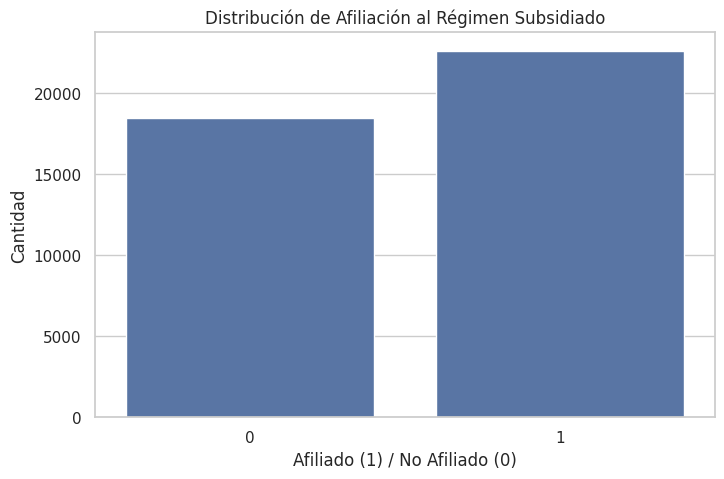


Matriz de Correlación:


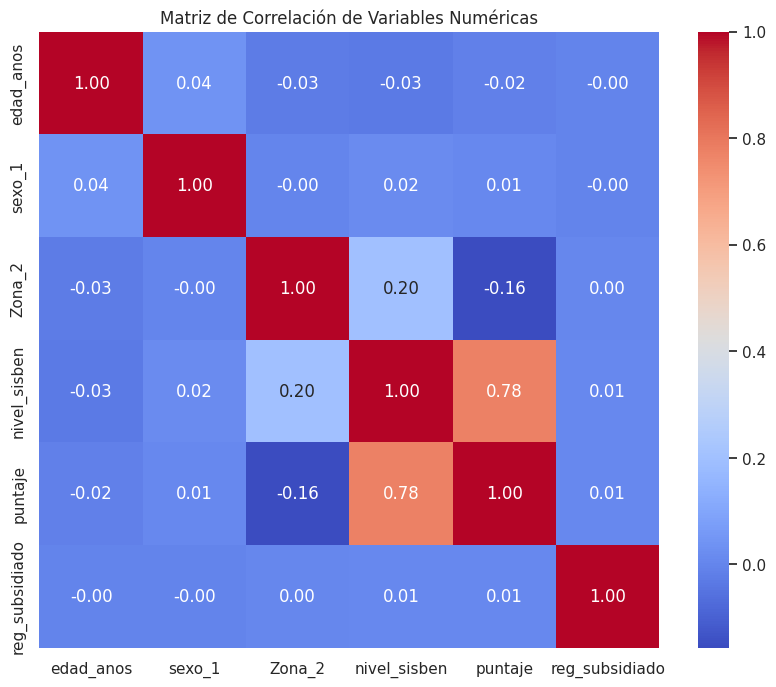

In [4]:
# ==============================================================================
# Celda 4: Análisis Exploratorio de Datos (EDA)
# ==============================================================================
print("\n--- 3. Análisis Exploratorio de Datos (EDA) ---")
# Estadísticas descriptivas para las variables numéricas
print("\nEstadísticas Descriptivas:")
print(df.describe())

# Análisis de frecuencia de variables categóricas
print("\nAnálisis de Variables Categóricas:")
categorical_cols = ['sexo_1', 'Zona_2', 'nivel_sisben', 'reg_subsidiado']
for col in categorical_cols:
    print(f"\n--- Frecuencia en '{col}' ---")
    print(df[col].value_counts())

# Gráfico de distribución de la variable objetivo de clasificación
plt.figure(figsize=(8, 5))
sns.countplot(x='reg_subsidiado', data=df)
plt.title('Distribución de Afiliación al Régimen Subsidiado')
plt.xlabel('Afiliado (1) / No Afiliado (0)')
plt.ylabel('Cantidad')
plt.show()

# Matriz de correlación para variables numéricas
print("\nMatriz de Correlación:")
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

In [5]:
# ==============================================================================
# Celda 5: Modelo de Regresión - Preparación
# ==============================================================================
print("\n--- 4. Problema de Regresión: Predecir 'puntaje' ---")
# Variable objetivo (y) y variables predictoras (X)
y_reg = df['puntaje']
X_reg = df.drop('puntaje', axis=1)

# División en datos de entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
print(f"Datos para regresión: {X_train_reg.shape[0]} para entrenamiento, {X_test_reg.shape[0]} para prueba.")



--- 4. Problema de Regresión: Predecir 'puntaje' ---
Datos para regresión: 32892 para entrenamiento, 8224 para prueba.


In [6]:
# ==============================================================================
# Celda 6: Modelo de Regresión - Entrenamiento y Evaluación
# ==============================================================================
print("\nEntrenamiento y Evaluación del Modelo de Regresión:")
# Inicializar y entrenar el modelo de árbol de decisión
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_train_reg, y_train_reg)

# Realizar predicciones y evaluar el modelo
y_pred_reg = regressor.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")



Entrenamiento y Evaluación del Modelo de Regresión:
Error Cuadrático Medio (MSE): 74.85
Raíz del Error Cuadrático Medio (RMSE): 8.65
Coeficiente de Determinación (R²): 0.73


In [7]:
# ==============================================================================
# Celda 7: Modelo de Regresión - Predicción con Nuevos Datos
# ==============================================================================
print("\nEjemplo de Predicción de Regresión:")
# Crear un DataFrame con el nuevo dato
nuevo_dato_reg = pd.DataFrame([[45, 1, 2, 3, 1]], columns=X_reg.columns)
# Predecir el puntaje
prediccion_puntaje = regressor.predict(nuevo_dato_reg)
print(f"Datos de entrada: Edad=45, Sexo=1, Zona=2, Nivel Sisben=3, Afiliado=1")
print(f"--> Puntaje Predicho: {prediccion_puntaje[0]:.2f}")



Ejemplo de Predicción de Regresión:
Datos de entrada: Edad=45, Sexo=1, Zona=2, Nivel Sisben=3, Afiliado=1
--> Puntaje Predicho: 56.03


In [8]:
# ==============================================================================
# Celda 8: Modelo de Clasificación - Preparación
# ==============================================================================
print("\n--- 5. Problema de Clasificación: Predecir 'reg_subsidiado' ---")
# Variable objetivo (y) y variables predictoras (X)
y_clf = df['reg_subsidiado']
X_clf = df.drop('reg_subsidiado', axis=1)

# División estratificada para mantener la proporción de clases
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)
print(f"Datos para clasificación: {X_train_clf.shape[0]} para entrenamiento, {X_test_clf.shape[0]} para prueba.")



--- 5. Problema de Clasificación: Predecir 'reg_subsidiado' ---
Datos para clasificación: 32892 para entrenamiento, 8224 para prueba.



Entrenamiento y Evaluación del Modelo de Clasificación:
Precisión (Accuracy): 0.55

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.53      0.01      0.02      3699
           1       0.55      0.99      0.71      4525

    accuracy                           0.55      8224
   macro avg       0.54      0.50      0.37      8224
weighted avg       0.54      0.55      0.40      8224



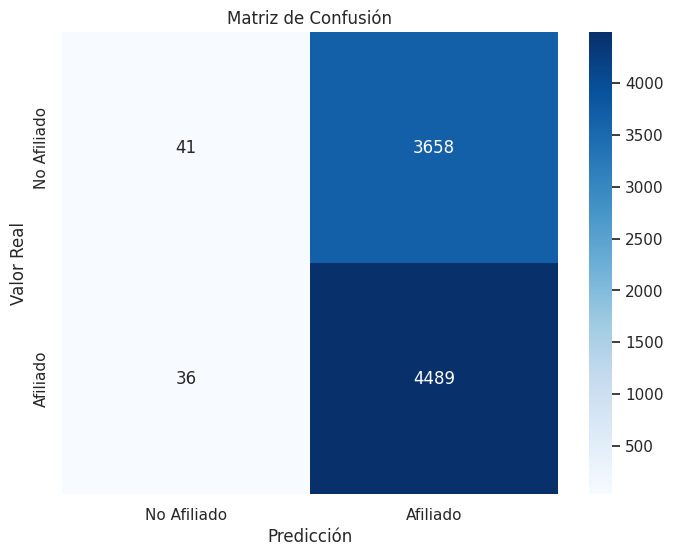

In [9]:
# ==============================================================================
# Celda 9: Modelo de Clasificación - Entrenamiento y Evaluación
# ==============================================================================
print("\nEntrenamiento y Evaluación del Modelo de Clasificación:")
# Inicializar y entrenar el clasificador
classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
classifier.fit(X_train_clf, y_train_clf)

# Realizar predicciones y evaluar
y_pred_clf = classifier.predict(X_test_clf)
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Precisión (Accuracy): {accuracy:.2f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test_clf, y_pred_clf))

# Matriz de confusión
cm = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Afiliado', 'Afiliado'], yticklabels=['No Afiliado', 'Afiliado'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


In [10]:
# ==============================================================================
# Celda 10: Modelo de Clasificación - Predicción con Nuevos Datos
# ==============================================================================
print("\nEjemplo de Predicción de Clasificación:")
# Crear un DataFrame para la predicción
nuevo_dato_clf = pd.DataFrame([[35, 2, 1, 1, 25.5]], columns=X_clf.columns)
# Predecir la afiliación y sus probabilidades
prediccion_afiliacion = classifier.predict(nuevo_dato_clf)
probabilidades_afiliacion = classifier.predict_proba(nuevo_dato_clf)
resultado = 'Afiliado' if prediccion_afiliacion[0] == 1 else 'No Afiliado'

print(f"Datos de entrada: Edad=35, Sexo=2, Zona=1, Nivel Sisben=1, Puntaje=25.5")
print(f"--> Predicción de Afiliación: {resultado} (Clase {prediccion_afiliacion[0]})")
print(f"--> Probabilidades [P(No Afiliado), P(Afiliado)]: {probabilidades_afiliacion}")




Ejemplo de Predicción de Clasificación:
Datos de entrada: Edad=35, Sexo=2, Zona=1, Nivel Sisben=1, Puntaje=25.5
--> Predicción de Afiliación: Afiliado (Clase 1)
--> Probabilidades [P(No Afiliado), P(Afiliado)]: [[0.44995658 0.55004342]]



Visualización del Árbol de Decisión para Clasificación:


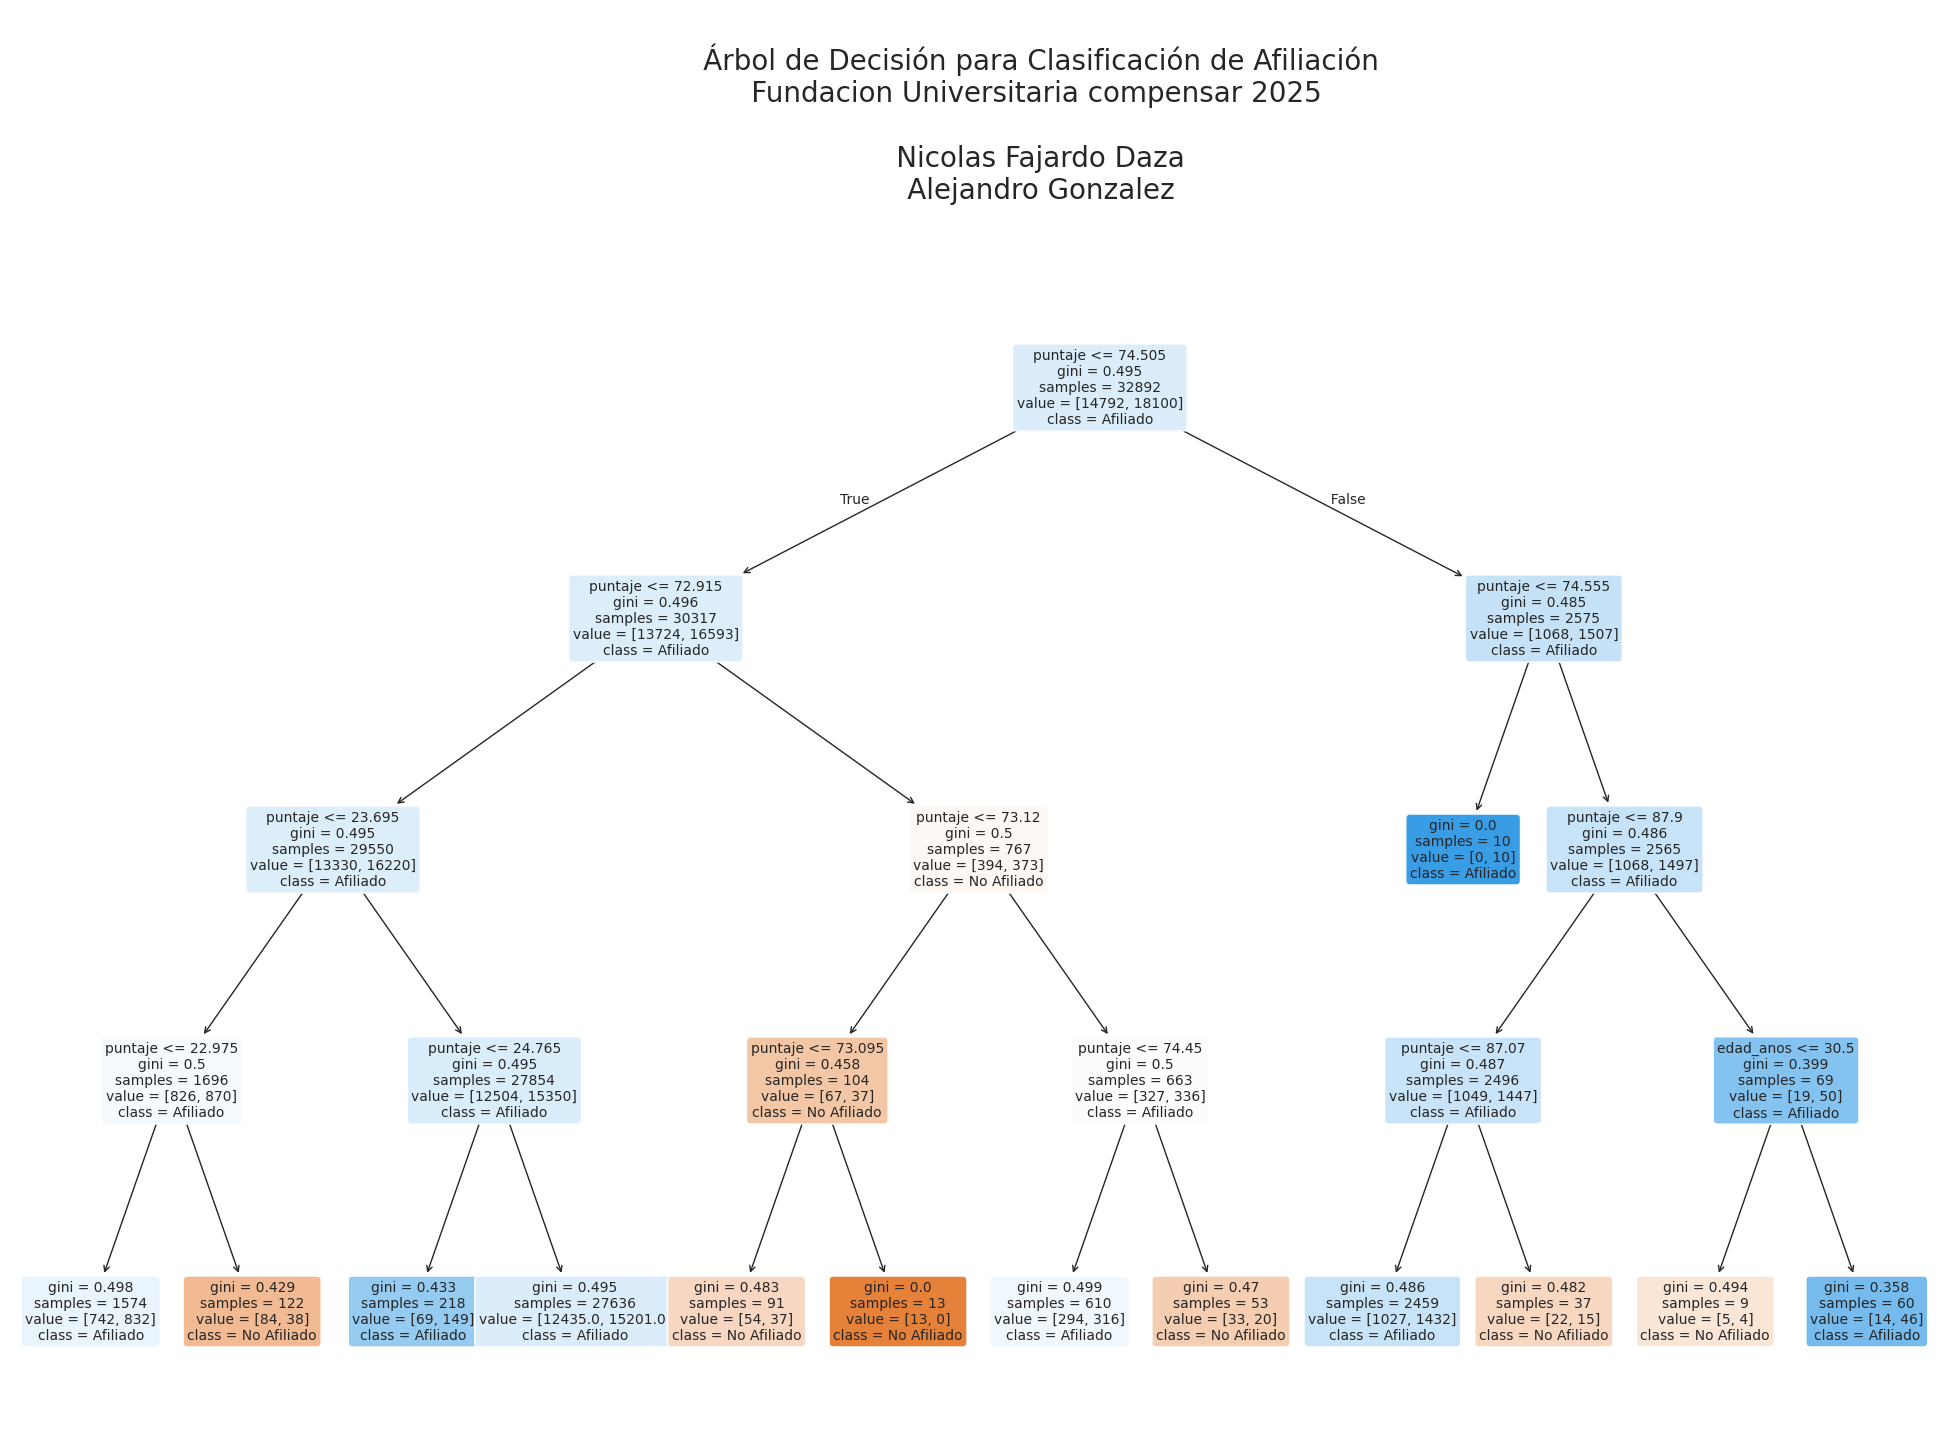

In [13]:
# ==============================================================================
# Celda 11: Visualización del Árbol de Clasificación
# ==============================================================================
print("\nVisualización del Árbol de Decisión para Clasificación:")
plt.figure(figsize=(25, 15))
plot_tree(classifier,
          feature_names=X_clf.columns,
          class_names=['No Afiliado', 'Afiliado'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title(f'''
              Árbol de Decisión para Clasificación de Afiliación
              Fundacion Universitaria compensar 2025

              Nicolas Fajardo Daza
              Alejandro Gonzalez

               ''', fontsize=20)

plt.show()